In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy

In [2]:
def perceptron_calc(x, w):
    if numpy.dot(x,w)>0: return 1
    return 0

In [3]:
def perceptron_error(samples, w):
    return sum((abs(d-perceptron_calc(x,w)) for (x,d) in samples))/len(samples)

In [4]:
def perceptron_learn(n, samples, max_iter, max_err):
    """
    returns the perceptron weights
    """
    samples = [([1]+x,d) for (x,d) in samples] # insert x0=1
    w,w2 = [random.uniform(0,1) for i in range(n+1)], [0]*(n+1) # current and next weights
    for iter_number in range(max_iter): # limit the number of iterations
        for (x,d) in samples: # x is the sample input and d is desired classification
            y_diff = d-perceptron_calc(x,w)
            if y_diff:
                for i in range(n+1): # for each weight
                    w2[i]=w[i]+y_diff*x[i] # update the weight
        w,w2=w2,w # commit new weights (use old weights as temp vector to save garbage collection)
        err = perceptron_error(samples, w)
        if err <= max_err: return w # if perceptron has converged, finish
    raise Exception("perceptron did not converge under interations limit ):")

-1+x-3y>=0 את הפונקציה [x,y] כעת נלמד עבור הקלט
נשתמש ב-500 דוגמאות

In [15]:
samples = []
for i in range(700):
    x,y = random.gauss(0,5),random.gauss(0,5)
    d = (x-3*y-1>=0) and 1 or 0
    samples.append(([x,y], d))

w = perceptron_learn(2, samples, 500, 0.002)
# normalize
w = [wi/-w[0] for wi in w]
print('f([x,y]) = 1 iff %d + (%.2f)x + (%.2f)y > 0' % tuple(w))

f([x,y]) = 1 iff -1 + (0.98)x + (-3.01)y > 0


Let us now plot our results

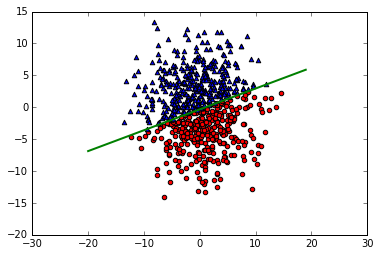

In [16]:
s1=[s[0] for s in samples if s[1]==1]
s2=[s[0] for s in samples if s[1]==0]
plt.scatter([s[0] for s in s1], [s[1] for s in s1], c='r', marker='o')
plt.scatter([s[0] for s in s2], [s[1] for s in s2], c='b', marker='^')
sep_x = range(-20,20,1)
sep_y = [(-w[0]-w[1]*x)/w[2] for x in sep_x]
plt.plot(sep_x,sep_y,c='g',linewidth=2)
plt.show()